# Linear Regression with Spark MLlib

In [ ]:
# Example: Linear Regression with Spark MLlib
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('MLlib Example').getOrCreate()

# Load sample data
data = [(1, 5.0, 20.0), (2, 10.0, 25.0), (3, 15.0, 30.0), (4, 20.0, 35.0)]
columns = ['ID', 'Feature', 'Target']
df = spark.createDataFrame(data, columns)

# Prepare data for modeling
assembler = VectorAssembler(inputCols=['Feature'], outputCol='Features')
df_transformed = assembler.transform(df)

# Train a linear regression model
lr = LinearRegression(featuresCol='Features', labelCol='Target')
model = lr.fit(df_transformed)

# Print model coefficients
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')

Coefficients: [0.9999999999999992]
Intercept: 15.000000000000009


# Practice: Logistic Regression

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors  # Import Vectors

# Initialize Spark Session
spark = SparkSession.builder.appName('MLlib Example').getOrCreate()

# Example dataset
data = [(1, [2.0, 3.0], 0), (2, [1.0, 5.0], 1), (3, [2.5, 4.5], 1), (4, [3.0, 6.0], 0)]
columns = ['ID', 'Features', 'Label']
df = spark.createDataFrame(data, columns)

# Convert 'Features' column to Vectors before using VectorAssembler
from pyspark.sql.functions import udf
from pyspark.ml.linalg import VectorUDT

# Define a UDF to convert lists to Vectors
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

# Apply the UDF to the 'Features' column
df = df.withColumn("Features", list_to_vector_udf("Features"))

# Create a VectorAssembler to convert the 'Features' column to VectorUDT
assembler = VectorAssembler(inputCols=['Features'], outputCol='Feature_vec') # outputCol can be anything
df = assembler.transform(df)

# Train logistic regression model using the new 'Feature_vec' column
lr = LogisticRegression(featuresCol='Feature_vec', labelCol='Label') # use outputCol name from the cell above.
model = lr.fit(df)

# Display coefficients and summary
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')

Coefficients: [-12.262057929180484,4.087352266486688]
Intercept: 11.56891272665312


#Practice: KMeans Clustering

In [ ]:
# Practice: KMeans Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import udf
from pyspark.ml.linalg import VectorUDT


# Example dataset
data = [(1, [1.0, 1.0]), (2, [5.0, 5.0]), (3, [10.0, 10.0]), (4, [15.0, 15.0])]
columns = ['ID', 'Features']
df = spark.createDataFrame(data, columns)

# Define a UDF to convert lists to Vectors
list_to_vector_udf = udf(lambda l: Vectors.dense(l), VectorUDT())

# Apply the UDF to the 'Features' column to convert it into a VectorUDT
df = df.withColumn("Features", list_to_vector_udf("Features"))

# Train KMeans clustering model
kmeans = KMeans(featuresCol='Features', k=2)
model = kmeans.fit(df)

# Show cluster centers
centers = model.clusterCenters()
print(f'Cluster Centers: {centers}')

Cluster Centers: [array([12.5, 12.5]), array([3., 3.])]


# Homework

## Load a real-world dataset into Spark and prepare it for machine learning tasks.

In [ ]:
!pip install requests pandas

In [ ]:
from io import StringIO
import pandas as pd
import requests
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# URL of the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Fetch the data
response = requests.get(url)
# Create a StringIO object to mimic a file
data_io = StringIO(response.text)
# Define column names
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# Load data into pandas DataFrame
iris_data = pd.read_csv(data_io, names=col_names)
# Convert pandas DataFrame to Spark DataFrame
iris_df = spark.createDataFrame(iris_data)

# Create a VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol="features"
)

# Transform the DataFrame to include the 'features' column
iris_df = assembler.transform(iris_df)

# Train KMeans clustering model
kmeans = KMeans(featuresCol="features", k=3) # Assuming 3 clusters for Iris dataset
model = kmeans.fit(iris_df)

# Show cluster centers
centers = model.clusterCenters()
print(f'Cluster Centers: {centers}')

# Add cluster predictions to the DataFrame
predictions = model.transform(iris_df)

# Show the predictions
predictions.select("species", "prediction").show()

Cluster Centers: [array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), array([5.006, 3.418, 1.464, 0.244]), array([5.88360656, 2.74098361, 4.38852459, 1.43442623])]
+-----------+----------+
|    species|prediction|
+-----------+----------+
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
|Iris-setosa|         1|
+-----------+----------+
only showing top 20 rows



## Build a classification model using Spark MLlib and evaluate its performance.

Accuracy: 0.875


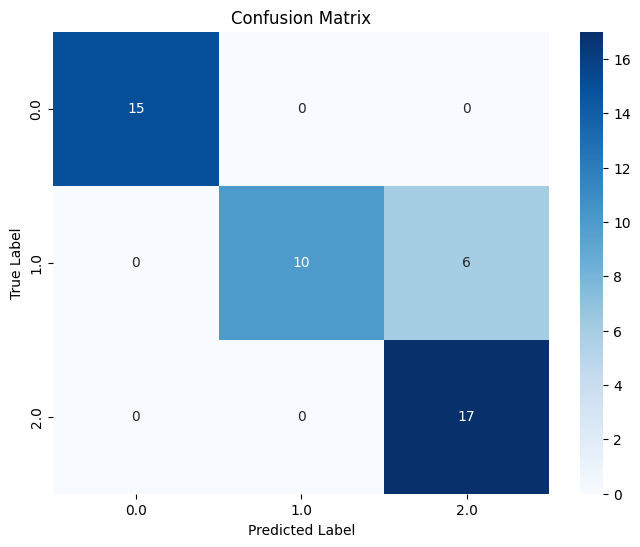

In [ ]:
from io import StringIO
import pandas as pd
import requests
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Fetch the data
response = requests.get(url)
# Create a StringIO object to mimic a file
data_io = StringIO(response.text)
# Define column names
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
# Load data into pandas DataFrame
iris_data = pd.read_csv(data_io, names=col_names)
# Convert pandas DataFrame to Spark DataFrame
iris_df = spark.createDataFrame(iris_data)


# 1. Prepare the Data

# Create a StringIndexer to convert the 'species' column to numerical labels
indexer = StringIndexer(inputCol="species", outputCol="label")

# Create a VectorAssembler to combine features into a single vector column
assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol="features"
)

# 2. Create a Pipeline

# Create a Pipeline to chain the indexer, assembler, and Logistic Regression model
pipeline = Pipeline(stages=[indexer, assembler, LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)])

# 3. Split the Data

# Split the data into training and testing sets
(trainingData, testData) = iris_df.randomSplit([0.7, 0.3], seed=100)

# 4. Train the Model

# Fit the pipeline to the training data
model = pipeline.fit(trainingData)

# 5. Make Predictions

# Make predictions on the test data
predictions = model.transform(testData)

# 6. Evaluate the Model

# Create an evaluator and calculate the accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")


# 7. Visualize Results (Optional)

# Convert predictions to Pandas DataFrame for visualization
pandas_predictions = predictions.select("label", "prediction").toPandas()

# Create a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(pandas_predictions['label'], pandas_predictions['prediction']), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,188 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,527 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MLlibClassification").getOrCreate()

In [ ]:
 # Install necessary libraries if not already installed
!pip install pyspark boto3 s3fs pandas requests matplotlib seaborn

# Import necessary libraries
from io import StringIO
import pandas as pd
import requests
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer, OneHotEncoder

# Initialize Spark session
spark = SparkSession.builder.appName("MLlibClassification").getOrCreate()

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Load the dataset using pandas first
titanic_pd_df = pd.read_csv(url)
# Create a Spark DataFrame from the pandas DataFrame
titanic_df = spark.createDataFrame(titanic_pd_df)


# Select relevant features and cast to appropriate data types
titanic_df = titanic_df.select(
    col("Survived").cast("int"),
    col("Pclass").cast("int"),
    col("Sex"),
    col("Age").cast("double"),
    col("SibSp").cast("int"),
    col("Parch").cast("int"),
    col("Fare").cast("double")
)

# Handle missing values (e.g., impute with mean for Age)
imputer = Imputer(inputCols=["Age"], outputCols=["AgeImputed"])
titanic_df = imputer.fit(titanic_df).transform(titanic_df).drop("Age").withColumnRenamed("AgeImputed", "Age")

# Convert categorical features to numerical using StringIndexer and OneHotEncoder
sexIndexer = StringIndexer(inputCol="Sex", outputCol="SexIndexed")
titanic_df = sexIndexer.fit(titanic_df).transform(titanic_df)

sexEncoder = OneHotEncoder(inputCols=["SexIndexed"], outputCols=["SexEncoded"])
titanic_df = sexEncoder.fit(titanic_df).transform(titanic_df)

# Assemble features into a vector using VectorAssembler
assembler = VectorAssembler(inputCols=["Pclass", "Age", "SibSp", "Parch", "Fare", "SexEncoded"], outputCol="features")
titanic_df = assembler.transform(titanic_df)

# Preapre it for Machine Learning Task

In [ ]:
# Import necessary libraries
from io import StringIO
import pandas as pd
import requests
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer, OneHotEncoder

# Initialize Spark session
spark = SparkSession.builder.appName("MLlibClassification").getOrCreate()

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Load the dataset using pandas first
titanic_pd_df = pd.read_csv(url)
# Create a Spark DataFrame from the pandas DataFrame
titanic_df = spark.createDataFrame(titanic_pd_df)


# Select relevant features and cast to appropriate data types
titanic_df = titanic_df.select(
    col("Survived").cast("int"),
    col("Pclass").cast("int"),
    col("Sex"),
    col("Age").cast("double"),
    col("SibSp").cast("int"),
    col("Parch").cast("int"),
    col("Fare").cast("double")
)

# Handle missing values (e.g., impute with mean for Age)
imputer = Imputer(inputCols=["Age"], outputCols=["AgeImputed"])
titanic_df = imputer.fit(titanic_df).transform(titanic_df).drop("Age").withColumnRenamed("AgeImputed", "Age")

# Convert categorical features to numerical using StringIndexer and OneHotEncoder
sexIndexer = StringIndexer(inputCol="Sex", outputCol="SexIndexed")
titanic_df = sexIndexer.fit(titanic_df).transform(titanic_df)

sexEncoder = OneHotEncoder(inputCols=["SexIndexed"], outputCols=["SexEncoded"])
titanic_df = sexEncoder.fit(titanic_df).transform(titanic_df)

# Assemble features into a vector using VectorAssembler
assembler = VectorAssembler(inputCols=["Pclass", "Age", "SibSp", "Parch", "Fare", "SexEncoded"], outputCol="features")
titanic_df = assembler.transform(titanic_df)

# Menampilkan output
titanic_df.show() # Menampilkan beberapa baris pertama DataFrame
# atau
titanic_df.printSchema() # Menampilkan skema DataFrame

+--------+------+------+-----+-----+-------+-----------------+----------+-------------+--------------------+
|Survived|Pclass|   Sex|SibSp|Parch|   Fare|              Age|SexIndexed|   SexEncoded|            features|
+--------+------+------+-----+-----+-------+-----------------+----------+-------------+--------------------+
|       0|     3|  male|    1|    0|   7.25|             22.0|       0.0|(1,[0],[1.0])|[3.0,22.0,1.0,0.0...|
|       1|     1|female|    1|    0|71.2833|             38.0|       1.0|    (1,[],[])|[1.0,38.0,1.0,0.0...|
|       1|     3|female|    0|    0|  7.925|             26.0|       1.0|    (1,[],[])|[3.0,26.0,0.0,0.0...|
|       1|     1|female|    1|    0|   53.1|             35.0|       1.0|    (1,[],[])|[1.0,35.0,1.0,0.0...|
|       0|     3|  male|    0|    0|   8.05|             35.0|       0.0|(1,[0],[1.0])|[3.0,35.0,0.0,0.0...|
|       0|     3|  male|    0|    0| 8.4583|29.69911764705882|       0.0|(1,[0],[1.0])|[3.0,29.699117647...|
|       0|     1|  

# Build a Classification Model and Evaluate its Performance

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Split the data
(trainingData, testData) = titanic_df.randomSplit([0.7, 0.3], seed=123)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="Survived")

# Create a Pipeline
pipeline = Pipeline(stages=[lr])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions
predictions = model.transform(testData)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Survived")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8713937918441874


# Explore Hyperparameter Tunning using Cross-validation

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Create a CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

# Train the model using cross-validation
cvModel = crossval.fit(trainingData)

# Make predictions on the test data
predictions = cvModel.transform(testData)

# Evaluate the model's performance
accuracy = evaluator.evaluate(predictions)
print("Accuracy after cross-validation:", accuracy)

Accuracy after cross-validation: 0.8578210590383445


# Visualisasi Setelah evaluasi model awal dan setelah hyperparameter

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Accuracy: 0.8578210590383446


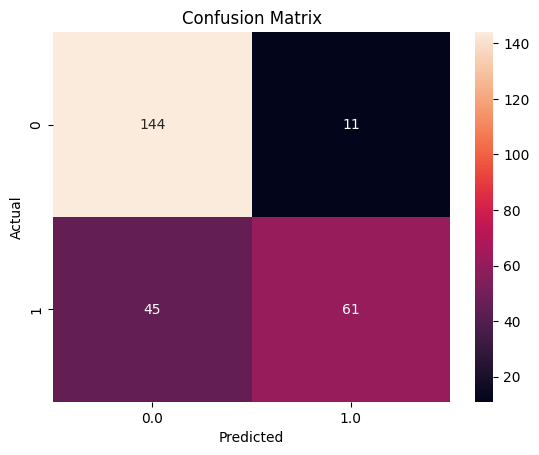

In [ ]:
# ... (kode sebelumnya) ...

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Survived")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Convert predictions to Pandas DataFrame for visualization
predictions_pd = predictions.select("Survived", "prediction").toPandas()

# Confusion Matrix
confusion_matrix = pd.crosstab(predictions_pd["Survived"], predictions_pd["prediction"], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Other visualizations (e.g., distribution of predictions) can be added here

# Grafik

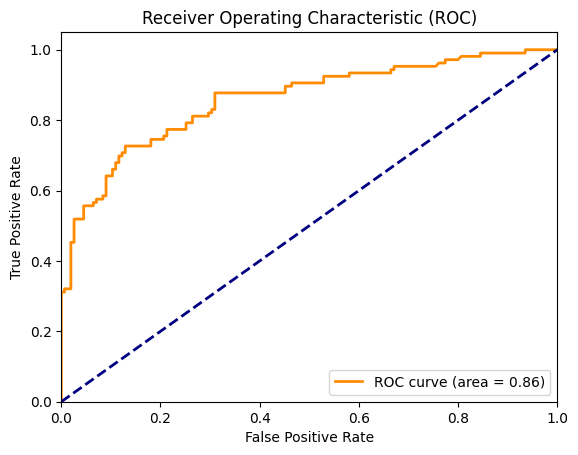

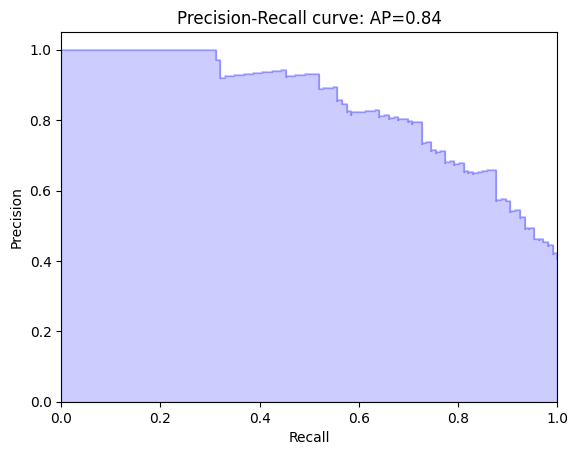

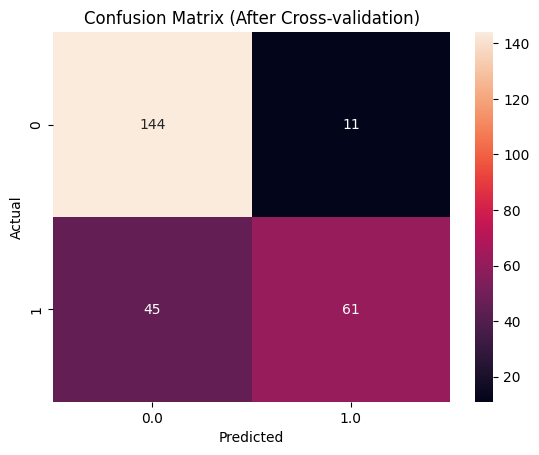

In [ ]:
from io import StringIO
import pandas as pd
import requests
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer, StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


# Initialize Spark session
spark = SparkSession.builder.appName("MLlibClassification").getOrCreate()

# Load the dataset
# ... (kode untuk memuat data dan preprocessing seperti sebelumnya) ...


# Split the data
(trainingData, testData) = titanic_df.randomSplit([0.7, 0.3], seed=123)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="Survived")

# Create a Pipeline
pipeline = Pipeline(stages=[lr])

# Define the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Create a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Survived")

# Create a CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

# Train the model using cross-validation
cvModel = crossval.fit(trainingData)

# Make predictions on the test data
predictions = cvModel.transform(testData)

# Convert predictions to Pandas DataFrame for visualization
predictions_pd = predictions.select("Survived", "prediction", "probability").toPandas()

# ROC Curve
fpr, tpr, thresholds = roc_curve(predictions_pd["Survived"], predictions_pd["probability"].apply(lambda x: x[1]))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(predictions_pd["Survived"], predictions_pd["probability"].apply(lambda x: x[1]))
average_precision = average_precision_score(predictions_pd["Survived"], predictions_pd["probability"].apply(lambda x: x[1]))

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

# Confusion Matrix
confusion_matrix = pd.crosstab(predictions_pd["Survived"], predictions_pd["prediction"], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix (After Cross-validation)")
plt.show()